# **Load Data**

In [1]:
# import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# load dataset from your own drive folder

#df = pd.read_csv('/content/drive/My Drive/datasets_example/Dataset1_Customer_Churn.csv')
df = pd.read_csv('Dataset1_Customer_Churn.csv')

# **Data Understanding & Exploration**

1.    CustomerID = Nilai random yang digunakan untuk menandakan setiap nasabah.
2.   Gender = Jenis Kelamin
3. Age = Umur
4. Credit Score = Kredit Skor. Biasanya semakin tinggi kredit skor, semakin kecil kemungkinannya untuk churn. Nanti dapat dicek kembali melalui visualisasi data apakah benar atau tidak.
5. Estimated Salary = Perkiraan Gaji yang dimiliki. Biasanya semakin rendah gaji yang dimiliki, lebih besar kemungkinan nasabah untuk churn. Dapat dicek lebih lanjut
6. HasCrCard = Memiliki kartu kredit atau tidak. (0= Tidak & 1= Iya)
7. Exited = Apakah nasabah sudah meninggalkan bank atau tidak. (0= Tidak & 1= Iya)


In [4]:
df.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0


pada dataset Customer Churn ini memiliki 10 ribu baris dan 7 kolom

In [5]:
df.shape

(10000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   EstimatedSalary  10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


Pada statistika deskriptif dibawah menunjukkan bahwa rata-rata umur pelanggan berada di kisaran 39 tahun dengan rata-rata gaji berada di kisaran 100 ribu dollar. Value rata-rata dengan nilai median (Q2) tidak jauh berbeda artinya persebaran umur dan gaji hampir menyebar normal. Namun, harus dicek kembali apakah ada data outliers atau tidak.

In [7]:
df.describe()

,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,38.921800,650.528800,100090.239881,0.70550,0.203700
std,7.193619e+04,10.487806,96.653299,57510.492818,0.45584,0.402769
min,1.556570e+07,18.000000,350.000000,11.580000,0.00000,0.000000
25%,1.562853e+07,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,1.569074e+07,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,1.575323e+07,44.000000,718.000000,149388.247500,1.00000,0.000000
max,1.581569e+07,92.000000,850.000000,199992.480000,1.00000,1.000000


## Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'CustomerId'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'CreditScore'),
  Text(0, 3.5, 'EstimatedSalary'),
  Text(0, 4.5, 'HasCrCard'),
  Text(0, 5.5, 'Exited')])

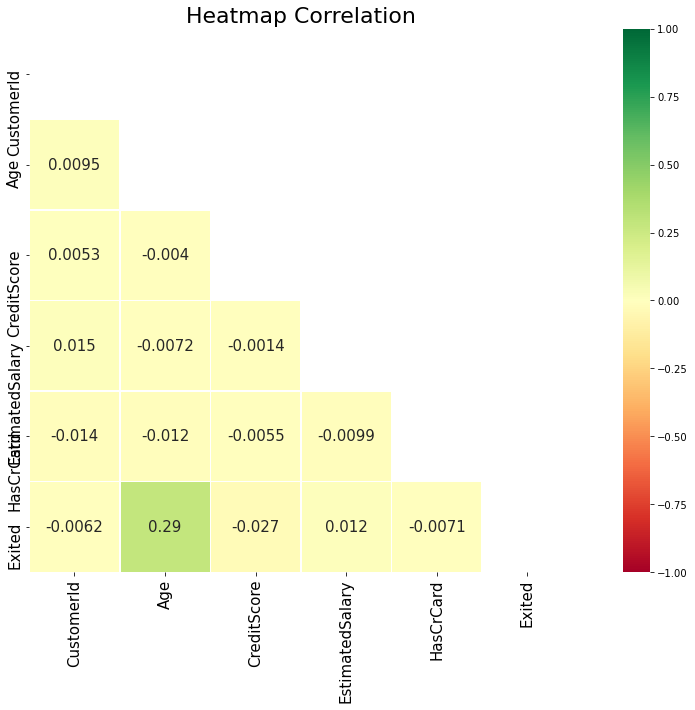

In [8]:
import seaborn as sns
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 10))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Pada heatmap correlation diatas terlihat bahwa variabel yang berpengaruh terhadap churn atau tidaknya customer adalah Age, CreditScore, dan EstimatedSalary.

* Age berkorelasi positif dengan exited customer artinya semakin tua customer tersebut semakin besar kemungkinannya untuk churn
* CreditScore berkorelasi negatif dengan exited customer artinya semakin kecil CreditScore maka semakin besar kemungkinannya untuk churn
* EstimatedSalary berkorelasi positif dengan exited customer, meskipun variabel ini lebih kecil korelasinya diantara Age dan CreditScore. Variabel ini tetap memiliki pengaruh.

c:\Users\Rizky Isya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Rizky Isya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Churn')

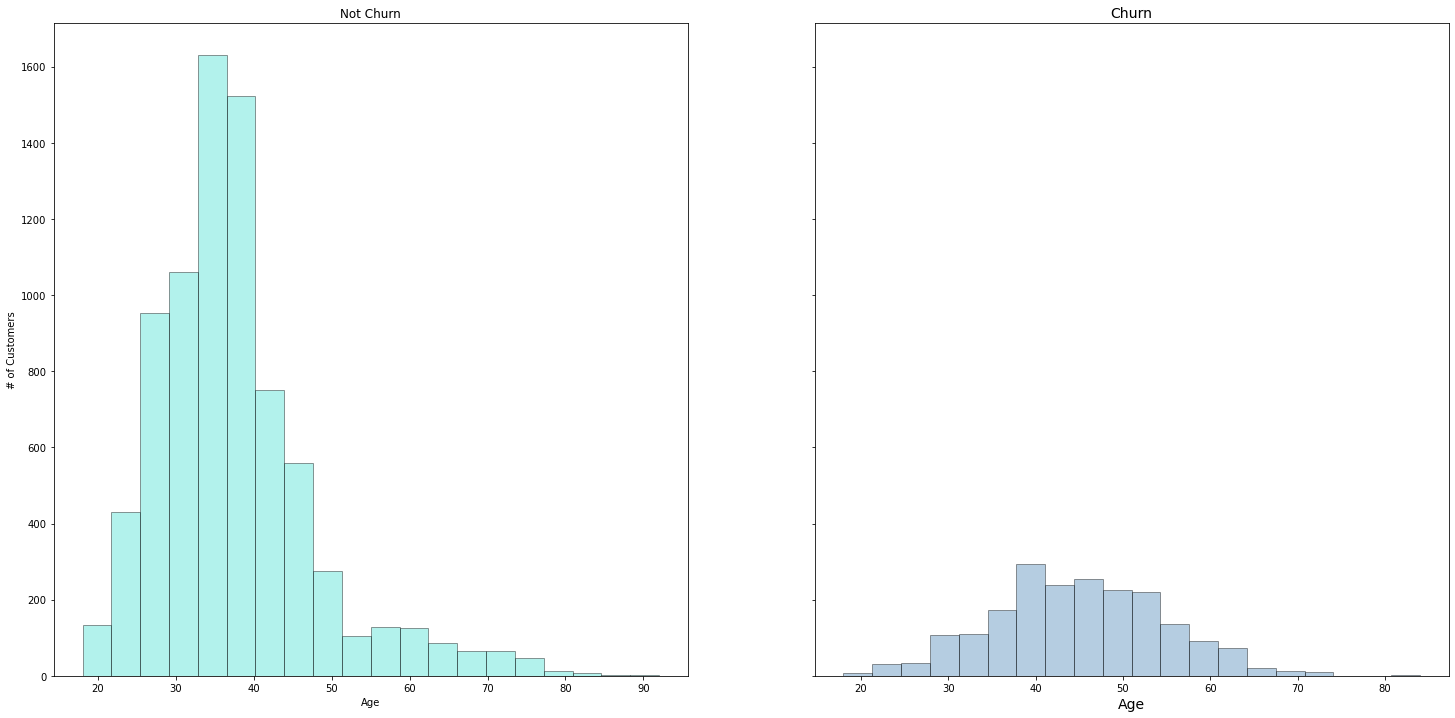

In [9]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = [25,12])

ax = sns.distplot(df[df['Exited'] == 0]['Age'],
                   hist=True, kde=False,
                   bins=20, color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age')
ax.set_title('Not Churn')

ax = sns.distplot(df[df['Exited'] == 1]['Age'],
                   hist=True, kde=False,
                   bins=20, color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Age',size = 14)
ax.set_title('Churn',size = 14)

Dari histogram diatas, nasabah yang berumur 50 tahun ke atas lebih besar kemungkinannya untuk churn daripada yang berusia 50 tahun ke bawah. Mengapa demikian?

Ini dikarenakan pada histogram sebelah kiri kita dapat melihat nasabah yang tidak churn terdistribusi dari umur 25 s.d. 45 tahun dan yang berumur 55 tahun keatas memiliki proporsi yang kecil. Ini artinya proporsi histogram churn di atas pada umur yang lebih tua lebih tinggi dibandingkan yang berumur muda.

In [10]:
import plotly.express as px

In [11]:
x = pd.DataFrame({'count': [df[df['Exited'] == 0].shape[0], df[df['Exited'] == 1].shape[0]],
                   'churn': ['Not Churn', 'Churn']})
px.pie(x, values='count', names='churn', title='Churn Population')

Dapat terlihat bahwa 79% nasabah bank masih aktif. Sementara 20% lainnya telah berhenti menjadi nasabah bank. Berdasarkan hasil ini juga menunjukkan bahwa dataset imbalanced dan akan dilakukan SMOTE data pada tahap Modeling.

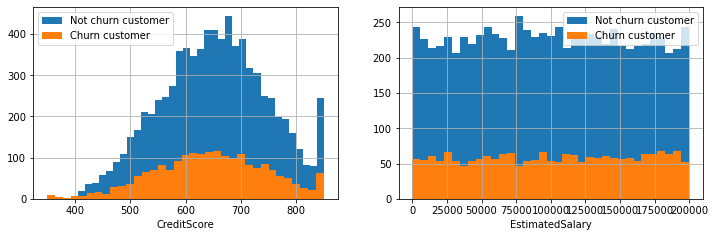

In [12]:
num_feature = ['CreditScore','EstimatedSalary']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(num_feature, 1):
    plt.subplot(3, 2, i)
    df[df.Exited == 0][feature].hist(bins=35, label='Not churn customer', alpha=1)
    df[df.Exited == 1][feature].hist(bins=35, label='Churn customer', alpha=1)
    plt.legend()
    plt.xlabel(feature)

Pada histogram CreditScore diatas dapat terlihat bahwa persebaran churn customer pada credit score 600 hampir sama dengan customer churn yang memiliki credit skor 700. Padahal dapat dilihat bahwa customer yang tidak churn dengan credit score 700 sedikit lebih banyak ketimbang yang memiliki credit score 600

Sedangkan untuk EstimatedSalary terlihat bahwa persebaran antara customer yang churn dan tidak menyebar hampir merata. Meskipun begitu, variabel ini tetap memiliki pengaruh pada customer yang churn dan tidak

<AxesSubplot:xlabel='Gender', ylabel='count'>

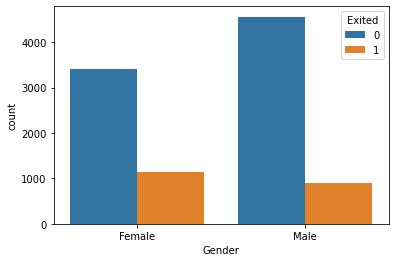

In [13]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

Dikarenakan pada visualisasi heatmap correlation di atas, CustomerID & HsCrCard tidak menunjukkan hubungan yang kuat dengan variabel Exited maka kolom CustomerID & HsCrCard akan di-drop. Drop kolom akan dilakukan pada tahap **Preprocessing**.

## Imblanced Datasets?

## Simplifikasi Column Name

Mengsimplifikasi nama-nama kolom agar memproses data menjadi lebih mudah.
1.   CustomerId = X1
2.   Gender = X2
3. Age = X3
4. CreditScore = X4
5. EstimatedSalary = X5
6. HasCrCard = X6
7. Exited = Y


In [14]:
df.rename(columns={'CustomerId' : 'X1', 'Gender':'X2',
       'Age':'X3',
       'CreditScore':'X4', 'EstimatedSalary':'X5', 'HasCrCard':'X6',
       'Exited':'Y'}, inplace=True)

## Encode Column 'Gender/X2

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['X2'] = le.fit_transform(df['X2'])

Pada bagian ini Gender (X2) yang berupa string di-encode menjadi integer. Female = 0 dan Male = 1

In [16]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,15634602,0,42,619,101348.88,1,1
1,15647311,0,41,608,112542.58,0,0
2,15619304,0,42,502,113931.57,1,1
3,15701354,0,39,699,93826.63,0,0
4,15737888,0,43,850,79084.10,1,0


In [17]:
df["Y"].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Y, dtype: float64

## Checking Multicolinearity


In [18]:
df

,X1,X2,X3,X4,X5,X6,Y
0,15634602,0,42,619,101348.88,1,1
1,15647311,0,41,608,112542.58,0,0
2,15619304,0,42,502,113931.57,1,1
3,15701354,0,39,699,93826.63,0,0
4,15737888,0,43,850,79084.10,1,0
...,...,...,...,...,...,...,...
9995,15606229,1,39,771,96270.64,1,0
9996,15569892,1,35,516,101699.77,1,0
9997,15584532,0,36,709,42085.58,0,1
9998,15682355,1,42,772,92888.52,1,1


Text(0.5, 1.0, 'Correlation Matrix antara variable X')

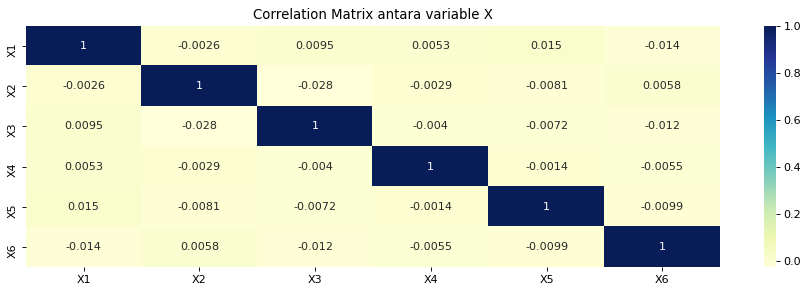

In [19]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:,'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Dari visualisasi multikolinearitas diatas terlihat bahwa tidak ada hubungan yang kuat antar hubungan Independent Variable (X)

# **Data Preprocessing**

In [20]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')

## Drop Column 

In [21]:
df = df.drop(['X1', 'X6'], axis=1)

## Check missing values

In [22]:
df.isnull().sum()

X2    0
X3    0
X4    0
X5    0
Y     0
dtype: int64

## Check duplicate values

In [23]:
df[df.duplicated(keep=False)]

,X2,X3,X4,X5,Y


## Check outlier

<AxesSubplot:title={'center':'Age'}>

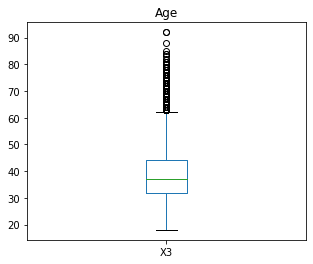

In [24]:
df['X3'].plot(kind='box', title='Age', figsize=(5,4))

<AxesSubplot:title={'center':'CreditScore'}>

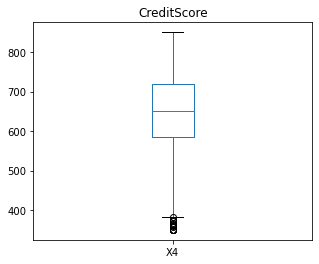

In [25]:
df['X4'].plot(kind='box', title='CreditScore', figsize=(5,4))

<AxesSubplot:title={'center':'EstimatedSalary'}>

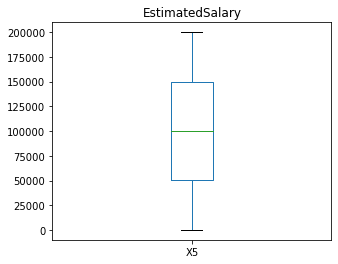

In [26]:
df['X5'].plot(kind='box', title='EstimatedSalary', figsize=(5,4))

Dari hasil pengecekan diketahui terdapat outlier pada 'Age' dan 'CreditScore'

## Removing Outlier 'Age / X3'

In [27]:
q1 = np.percentile(df.X3, 25) 
q3 = np.percentile(df.X3, 75)
iqr = q3-q1
lower_bound_age = q1 - (1.5*iqr)
upper_bound_age = q3 + (1.5*iqr)

In [28]:
lower_bound_age

14.0

In [29]:
upper_bound_age

62.0

In [30]:
df_Age_outlier = df[(df['X3'] < lower_bound_age) | (df['X3'] > upper_bound_age)]
df_Age_outlier

,X2,X3,X4,X5,Y
58,0,66,511,1643.11,1
85,0,75,652,114675.75,0
104,0,65,670,177655.68,1
158,0,73,646,104719.66,0
181,1,65,510,48071.61,0
...,...,...,...,...,...
9753,1,68,656,186574.68,0
9765,1,64,445,43678.06,0
9832,0,64,595,89935.73,1
9894,0,77,521,49054.10,0


In [31]:
lower_age = np.where((df['X3'] < lower_bound_age))
upper_age = np.where((df['X3'] > upper_bound_age))

In [32]:
lower_age

(array([], dtype=int64),)

In [33]:
upper_age

(array([  58,   85,  104,  158,  181,  230,  234,  243,  252,  310,  364,
         371,  385,  399,  559,  567,  602,  612,  658,  678,  736,  766,
         769,  807,  811,  823,  859,  884,  888,  948,  952,  957,  963,
         969, 1009, 1039, 1040, 1055, 1205, 1234, 1235, 1246, 1252, 1278,
        1285, 1342, 1387, 1407, 1410, 1439, 1457, 1519, 1543, 1607, 1614,
        1790, 1810, 1866, 1901, 1904, 1907, 1933, 1981, 2002, 2012, 2039,
        2053, 2078, 2094, 2108, 2154, 2159, 2164, 2244, 2274, 2433, 2458,
        2459, 2553, 2615, 2670, 2713, 2717, 2760, 2772, 2778, 2791, 2855,
        2877, 2901, 2908, 2925, 2926, 3033, 3054, 3110, 3142, 3192, 3203,
        3229, 3311, 3314, 3317, 3346, 3366, 3368, 3378, 3382, 3384, 3387,
        3396, 3434, 3497, 3499, 3527, 3531, 3541, 3559, 3573, 3575, 3602,
        3646, 3647, 3651, 3690, 3691, 3702, 3728, 3733, 3761, 3813, 3826,
        3880, 3881, 3888, 3909, 3910, 3927, 3940, 3980, 3994, 4010, 4025,
        4048, 4051, 4142, 4147, 4162, 

In [34]:
df.drop(upper_age[0], inplace = True)
df.drop(lower_age[0], inplace = True)

<AxesSubplot:title={'center':'Age'}>

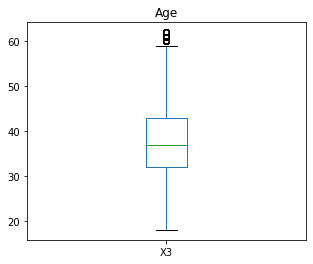

In [35]:
df['X3'].plot(kind='box', title='Age', figsize=(5,4))

## Removing Outlier 'CreditScore / X4'

In [36]:
q1 = np.percentile(df.X4, 25) 
q3 = np.percentile(df.X4, 75)
iqr = q3-q1
lower_bound_credit = q1 - (1.5*iqr)
upper_bound_credit = q3 + (1.5*iqr)

In [37]:
df_Credit_outlier = df[(df['X4'] < lower_bound_credit) | (df['X4'] > upper_bound_credit)]
df_Credit_outlier

,X2,X3,X4,X5,Y
7,0,29,376,119346.88,1
942,0,46,376,157333.69,1
1193,0,28,363,100615.14,1
1405,0,44,359,146955.71,1
1631,1,54,350,191973.49,1
1838,1,39,350,123602.11,1
1962,0,52,358,141959.11,1
2473,0,57,351,169621.69,1
2579,1,30,365,81537.85,1
8154,1,42,367,168816.73,1


In [38]:
lower_credit = np.where((df['X4'] < lower_bound_credit))
upper_credit = np.where((df['X4'] > upper_bound_credit))

In [39]:
upper_credit

(array([], dtype=int64),)

In [40]:
lower_credit

(array([   7,  913, 1155, 1358, 1576, 1781, 1900, 2395, 2500, 7862, 8411,
        8448, 9024, 9279], dtype=int64),)

In [41]:
df.drop(upper_credit[0], inplace = True)
df.drop(lower_credit[0], inplace = True)

<AxesSubplot:title={'center':'Credit Score'}>

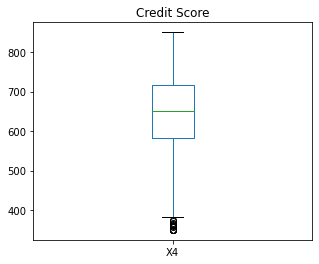

In [42]:
df['X4'].plot(kind='box', title='Credit Score', figsize=(5,4))

## Preparation before fitting

In [43]:
df_train = df.copy()
df_train.head()

,X2,X3,X4,X5,Y
0,0,42,619,101348.88,1
1,0,41,608,112542.58,0
2,0,42,502,113931.57,1
3,0,39,699,93826.63,0
4,0,43,850,79084.10,0


In [44]:
from sklearn.model_selection import train_test_split

# Split Train, test data
X = df_train.drop(columns=['Y']).copy()
y = df_train['Y'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

7220
2407


# **Modeling**

## SMOTE Imbalanced Data

In [45]:
y_train.value_counts()

0    5776
1    1444
Name: Y, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [47]:
y_smote.value_counts()

0    5776
1    5776
Name: Y, dtype: int64

## Standarization

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_smote[:])
X_smote[:] = scaler.transform(X_smote[:])
X_test[:] = scaler.transform(X_test[:])

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


log = LogisticRegression()
log.fit(X_smote, y_smote)
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1891
           1       0.39      0.62      0.48       516

    accuracy                           0.71      2407
   macro avg       0.63      0.68      0.64      2407
weighted avg       0.77      0.71      0.73      2407



## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_smote, y_smote)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78      1891
           1       0.35      0.60      0.44       516

    accuracy                           0.68      2407
   macro avg       0.61      0.65      0.61      2407
weighted avg       0.76      0.68      0.70      2407



## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_smote, y_smote)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1891
           1       0.33      0.50      0.40       516

    accuracy                           0.67      2407
   macro avg       0.58      0.61      0.59      2407
weighted avg       0.73      0.67      0.70      2407



## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1891
           1       0.37      0.56      0.45       516

    accuracy                           0.70      2407
   macro avg       0.62      0.65      0.62      2407
weighted avg       0.76      0.70      0.72      2407



## XGBoost Classifier

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_smote, y_smote)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1891
           1       0.40      0.57      0.47       516

    accuracy                           0.72      2407
   macro avg       0.63      0.67      0.64      2407
weighted avg       0.77      0.72      0.74      2407



# **Evaluation**

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score    
from sklearn.metrics import mean_squared_error   
from sklearn.metrics import mean_absolute_error 

In [55]:
def eval(model_name):
  if model_name == 'Logistic Regression':
    model = log
  elif model_name == 'KNN':
    model = knn
  elif model_name == 'Decision Tree':
    model = tree
  elif model_name == 'Random Forest':
    model = rf
  else:
    model = xgb
  y_pred = model.predict(X_test)         
  print(model_name)
  print('Accuracy score (training): {0:.3f}'.format(model.score(X_smote, y_smote)))
  print('Accuracy score (test): {0:.3f}'.format(model.score(X_test, y_test)))
  print('MSE: {0:.3f}'.format(mean_squared_error(y_test,y_pred)))
  print('MAE: {0:.3f}'.format(mean_absolute_error(y_test,y_pred)))
  print('RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
  print('')

## Evaluation each model

In [56]:
list_model = ['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost']

for model in list_model:
  eval(model)

Logistic Regression
Accuracy score (training): 0.730
Accuracy score (test): 0.707
MSE: 0.293
MAE: 0.293
RMSE: 0.541

KNN
Accuracy score (training): 0.810
Accuracy score (test): 0.680
MSE: 0.320
MAE: 0.320
RMSE: 0.566

Decision Tree
Accuracy score (training): 1.000
Accuracy score (test): 0.675
MSE: 0.325
MAE: 0.325
RMSE: 0.570

Random Forest
Accuracy score (training): 1.000
Accuracy score (test): 0.703
MSE: 0.297
MAE: 0.297
RMSE: 0.545

XGBoost
Accuracy score (training): 0.883
Accuracy score (test): 0.722
MSE: 0.278
MAE: 0.278
RMSE: 0.527



Berdasarkan hasil evaluasi, Logistic Regression dan XGBoost memiliki hasil yang paling baik. Selanjutnya bisa kita pertimbangkan dengan melihat recall dari masing-masing model

In [57]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1891
           1       0.39      0.62      0.48       516

    accuracy                           0.71      2407
   macro avg       0.63      0.68      0.64      2407
weighted avg       0.77      0.71      0.73      2407



In [58]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1891
           1       0.40      0.57      0.47       516

    accuracy                           0.72      2407
   macro avg       0.63      0.67      0.64      2407
weighted avg       0.77      0.72      0.74      2407



Berdasarkan hasil evaluasi XGBoost adalah model terbaik yang akan digunakan

# **Deployment**

In [59]:
import pickle

In [60]:
# saving the model  
with open('app deploy/model.pkl','wb') as file:
    pickle.dump(xgb, file)

In [61]:
model_columns = list(X.columns)
model_columns

['X2', 'X3', 'X4', 'X5']

In [62]:
with open('app deploy/model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)

## Testing data

In [63]:
trained_load_model = pickle.load(open("app deploy/model.pkl", "rb"))
trained_load_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
data = {
    'X2':[0],
    'X3':[42],
    'X4':[619],
    'X5':[101348.88]
}
data = pd.DataFrame(data)
data

,X2,X3,X4,X5
0,0,42,619,101348.88


In [65]:
data = pd.DataFrame(scaler.transform(data),columns = data.columns)
data

,X2,X3,X4,X5
0,-0.845104,0.219262,-0.320024,0.000322


In [66]:
trained_load_model.predict(data)[0]

1